<a id='head_selection_1'></a>
# Predicting flight delation
## Description
This project is made to analyse, understand and make model of Flight Delays Data from 2015. This data set is part of kaggle datasets: https://www.kaggle.com/usdot/flight-delays
## Project assumptions:
1. Feature engeneering and data manipluation will be done in seperate notebook
2. Data visualization will be done in seprate notebook
3. Model will only have variables that are avaiable before plane airborn
4. Flight is delayed when delation is at least 15 minutes at arrival
5. Model will be predicted as classification problem, where 0 - not delayed, 1 - delayed
6. Cancelled and diverted flights will be skipped in that project

### Steps
- Improting data ✅
- Understanding data ✅
- Feature engineering ✅
- Analysing data ✅
-  Plotting data in depend of:
    - airport ✅
    - airline ✅
- Modeling data ✅
- Finding best algorithm ✅

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import  metrics

# Data import

In [2]:
data = pd.read_csv('DATA/flights.csv')

C:\Users\damix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


####  Warning informs that columns 7 and 8 have data types mixed. This is a very important point for the future. (1)

In [3]:
print(data.shape)

(5819079, 31)


In [4]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


# Understanding variables

* *YEAR*, *MONTH*, *DAY*, *DAY_OF_WEEK* - dates of the flight
* AIRLINE  -An identification number assigned by US GOV to identify a unique airline
* FLIGHT_NUMBER -The common unique flight number of the flight.
* TAIL_NUMBER -  The unique aircraft number.
* ORIGIN_AIRPORT, DESTINATION_AIRPORT - code attributed by IATA to identify the airports
* SCHEDULED_DEPARTURE - scheduled time of departure
* SCHEDULED_ARRIVAL - scheduled time of arrival
* DEPARTURE_TIME, ARRIVAL_TIME - real times at which take-off and landing took place
* DEPARTURE_DELAY, ARRIVAL_DELAY - difference (in minutes) between planned and real times
* TAXI_OUT - elapsed time from gate to take-off
* WHEELS_OFF - time of take off
* SCHEDULED_TIME - scheduled duration of flight
* ELAPSED_TIME - time elapsed from taxi out to taxi in
* AIR_TIME - air time of flight
* DISTANCE - distance of flight (in miles),
* WHEELS_ON -  time of landing
* TAXI_IN - time that elapsed from landing and docking in gate
* DIVERTED - 1 if flight have been diverted and landed on another airport that scheduled
* CANCELLED - 1 if flight have been canceleed
* CANCELLATION_REASON - reson of flight cancellation
* AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY - reasons of delay

***
# Feature engineering

Whole process of data transformation has been implemented in [Flights_data_transformation notebook](Flight_data_transformation.ipynb#head_selection_3) and implemented in flight_data_transformer function in flight_data_transformation.py file.

In [6]:
import flight_data_transformation as fdf

In [7]:
Flights_Delays_Combined = fdf.flight_data_transformer(data)

In [8]:
Flights_Delays_Combined.head()

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,WHEELS_ON,TAXI_IN,ARRIVAL_DELAY,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE,DayOfWeek,Holidays
0,AS,98,N407AS,ANC,SEA,-11.0,21.0,00:15:00,205.0,194.0,...,04:04:00,4.0,-22.0,23:54:00,04:30:00,00:05:00,04:08:00,2015-01-01,3,0
1,AA,2336,N3KUAA,LAX,PBI,-8.0,12.0,00:14:00,280.0,279.0,...,07:37:00,4.0,-9.0,00:02:00,07:50:00,00:10:00,07:41:00,2015-01-01,3,0
2,US,840,N171US,SFO,CLT,-2.0,16.0,00:34:00,286.0,293.0,...,08:00:00,11.0,5.0,00:18:00,08:06:00,00:20:00,08:11:00,2015-01-01,3,0
3,AA,258,N3HYAA,LAX,MIA,-5.0,15.0,00:30:00,285.0,281.0,...,07:48:00,8.0,-9.0,00:15:00,08:05:00,00:20:00,07:56:00,2015-01-01,3,0
4,AS,135,N527AS,SEA,ANC,-1.0,11.0,00:35:00,235.0,215.0,...,02:54:00,5.0,-21.0,00:24:00,03:20:00,00:25:00,02:59:00,2015-01-01,3,0


In [9]:
Flights_Delays_Combined.shape

(5231130, 22)

***

In [10]:
numeric_columns = Flights_Delays_Combined.select_dtypes(include=np.number).columns
numeric_columns

Index(['FLIGHT_NUMBER', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'TAXI_IN', 'ARRIVAL_DELAY',
       'DayOfWeek', 'Holidays'],
      dtype='object')

In [11]:
non_numeric_columns = Flights_Delays_Combined.select_dtypes(exclude=np.number).columns
non_numeric_columns

Index(['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'WHEELS_OFF', 'WHEELS_ON', 'DEP_TIME', 'SCH_ARR_TIME', 'SCH_DEP_TIME',
       'ARR_TIME', 'DATE'],
      dtype='object')

## Correlation between numeric variables

In [12]:
del_corr = Flights_Delays_Combined.corr()

<AxesSubplot:>

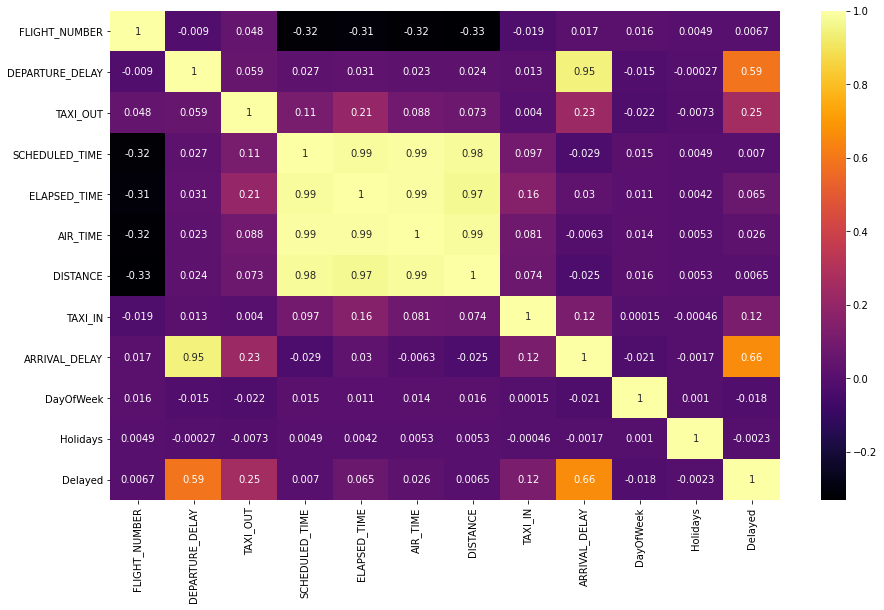

In [22]:
del_corr = Flights_Delays_Combined.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(del_corr,annot=True,cmap='inferno')

Correlation matrix shows, that Holidays have no significat numeric correlation between other variables.

Strongest correlation between ARRIVAL DELAY have:
- SCHEDULED_DEPARTURE
- DEPARTURE_TIME
- DEPARTURE_DELAY
- TAXI_OUT
- WHEELS_OFF
- TAXI_IN

# Transforming delays to binary values

Acording to project assumptions (4) I convert delay values to a binary value. The threshold I choose for the delay, according to FAA regulations, is 15 minutes

In [23]:
DELAY_TRESHOLD = 15

In [24]:
Flights_Delays_Combined.head()

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,TAXI_IN,ARRIVAL_DELAY,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE,DayOfWeek,Holidays,Delayed
0,AS,98,N407AS,ANC,SEA,-11.0,21.0,00:15:00,205.0,194.0,...,4.0,-22.0,23:54:00,04:30:00,00:05:00,04:08:00,2015-01-01,3,0,0
1,AA,2336,N3KUAA,LAX,PBI,-8.0,12.0,00:14:00,280.0,279.0,...,4.0,-9.0,00:02:00,07:50:00,00:10:00,07:41:00,2015-01-01,3,0,0
2,US,840,N171US,SFO,CLT,-2.0,16.0,00:34:00,286.0,293.0,...,11.0,5.0,00:18:00,08:06:00,00:20:00,08:11:00,2015-01-01,3,0,0
3,AA,258,N3HYAA,LAX,MIA,-5.0,15.0,00:30:00,285.0,281.0,...,8.0,-9.0,00:15:00,08:05:00,00:20:00,07:56:00,2015-01-01,3,0,0
4,AS,135,N527AS,SEA,ANC,-1.0,11.0,00:35:00,235.0,215.0,...,5.0,-21.0,00:24:00,03:20:00,00:25:00,02:59:00,2015-01-01,3,0,0


In [25]:
def delation_transformation(delay):
    return 1 if delay >= DELAY_TRESHOLD else 0

In [26]:
Flights_Delays_Combined['Delayed'] = Flights_Delays_Combined['ARRIVAL_DELAY'].apply(delation_transformation)

In [27]:
Flights_Delays_Binary = Flights_Delays_Combined.drop(['ARRIVAL_DELAY'], axis=1)

In [28]:
Flights_Delays_Binary

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,WHEELS_ON,TAXI_IN,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE,DayOfWeek,Holidays,Delayed
0,AS,98,N407AS,ANC,SEA,-11.0,21.0,00:15:00,205.0,194.0,...,04:04:00,4.0,23:54:00,04:30:00,00:05:00,04:08:00,2015-01-01,3,0,0
1,AA,2336,N3KUAA,LAX,PBI,-8.0,12.0,00:14:00,280.0,279.0,...,07:37:00,4.0,00:02:00,07:50:00,00:10:00,07:41:00,2015-01-01,3,0,0
2,US,840,N171US,SFO,CLT,-2.0,16.0,00:34:00,286.0,293.0,...,08:00:00,11.0,00:18:00,08:06:00,00:20:00,08:11:00,2015-01-01,3,0,0
3,AA,258,N3HYAA,LAX,MIA,-5.0,15.0,00:30:00,285.0,281.0,...,07:48:00,8.0,00:15:00,08:05:00,00:20:00,07:56:00,2015-01-01,3,0,0
4,AS,135,N527AS,SEA,ANC,-1.0,11.0,00:35:00,235.0,215.0,...,02:54:00,5.0,00:24:00,03:20:00,00:25:00,02:59:00,2015-01-01,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,B6,688,N657JB,LAX,BOS,-4.0,22.0,00:17:00,320.0,298.0,...,07:49:00,4.0,23:55:00,08:19:00,23:59:00,07:53:00,2015-12-31,3,0,0
5819075,B6,745,N828JB,JFK,PSE,-4.0,17.0,00:12:00,227.0,215.0,...,04:27:00,3.0,23:55:00,04:46:00,23:59:00,04:30:00,2015-12-31,3,0,0
5819076,B6,1503,N913JB,JFK,SJU,-9.0,17.0,00:07:00,221.0,222.0,...,04:24:00,8.0,23:50:00,04:40:00,23:59:00,04:32:00,2015-12-31,3,0,0
5819077,B6,333,N527JB,MCO,SJU,-6.0,10.0,00:03:00,161.0,157.0,...,03:27:00,3.0,23:53:00,03:40:00,23:59:00,03:30:00,2015-12-31,3,0,0


In [29]:
Flights_Delays_Binary.isnull().sum()

AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
DEP_TIME               0
SCH_ARR_TIME           0
SCH_DEP_TIME           0
ARR_TIME               0
DATE                   0
DayOfWeek              0
Holidays               0
Delayed                0
dtype: int64

From above result it follows that the are no missing data in final DataFrame.

## Data reduction
Because this dataset is large model will be trained only on sample. The sample is chosed by df.sample with 1% of random data.

In [30]:
random.seed(0)
Flights_Delays_Binary_small = Flights_Delays_Binary.sample(frac=0.01)
Flights_Delays_Binary_small.shape

(52311, 22)

***

# Making model of flight delation

According to project assumtion (3) there will be only used variables that are avaiable before start:

'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', ,'ORIGIN_AIRPORT','DESTINATION_AIRPORT', 'DEPARTURE_DELAY','TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME','DISTANCE', 'DEP_TIME', 'SCH_ARR_TIME', 'SCH_DEP_TIME', 'DATE', 'DayOfWeek', 'Holidays', 'Delayed'

In this project there are two models:

* **Model 1** is making predictions of flight delation based on most correlated variables that are avaiable in moment of plane take-off,
*  **Model 2** is making predictions of flight delation based on general information variables that are aviable long time before planned departure.

## Model 1

For model I use variables that have strongest correlation between variables:
* TAXI_IN,
* DayOfWeek,
* WHEELS_OFF,
* AIRLINE,
* ORIGIN_AIRPORT,
* DESTINATION_AIRPORT,
* DEP_TIME,
* SCH_DEP_TIME,
* SCH_ARR_TIME,
* DEPARTURE_DELAY,
* Delayed

### Preparing data for modeling

In [31]:
Flights_Delays_Binary_small.columns

Index(['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'DEP_TIME', 'SCH_ARR_TIME', 'SCH_DEP_TIME', 'ARR_TIME',
       'DATE', 'DayOfWeek', 'Holidays', 'Delayed'],
      dtype='object')

In [32]:
model_1_cols = ['TAXI_IN', 'DayOfWeek', 'WHEELS_OFF','AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','DEP_TIME','SCH_DEP_TIME','SCH_ARR_TIME','DEPARTURE_DELAY','Delayed']
Flights_Delays_Binary_model_1 = Flights_Delays_Binary_small[model_1_cols]

In [33]:
Flights_Delays_Binary_model_1

,TAXI_IN,DayOfWeek,WHEELS_OFF,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEP_TIME,SCH_DEP_TIME,SCH_ARR_TIME,DEPARTURE_DELAY,Delayed
1959004,6.0,1,12:43:00,MQ,DFW,FWA,12:22:00,12:25:00,15:50:00,-3.0,0
2839828,15.0,6,06:07:00,WN,DAY,BWI,05:54:00,06:00:00,07:20:00,-6.0,0
3081046,7.0,6,17:38:00,OO,LAX,PHX,17:10:00,16:45:00,18:15:00,25.0,1
2490882,4.0,6,11:51:00,WN,DEN,PHX,11:43:00,11:25:00,12:15:00,18.0,1
312996,10.0,2,14:14:00,AA,PSP,DFW,14:02:00,13:54:00,18:40:00,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2876796,4.0,1,09:19:00,AA,JFK,LAX,09:00:00,09:00:00,12:09:00,0.0,0
3270826,5.0,3,18:53:00,WN,FLL,BWI,18:41:00,18:35:00,21:25:00,6.0,0
5507914,12.0,4,18:25:00,OO,BNA,ORD,18:12:00,18:10:00,19:57:00,2.0,0
2990692,3.0,1,11:07:00,B6,CLT,JFK,10:50:00,10:11:00,12:03:00,39.0,1


In [34]:
Flights_Delays_Binary_model_1.head()

,TAXI_IN,DayOfWeek,WHEELS_OFF,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEP_TIME,SCH_DEP_TIME,SCH_ARR_TIME,DEPARTURE_DELAY,Delayed
1959004,6.0,1,12:43:00,MQ,DFW,FWA,12:22:00,12:25:00,15:50:00,-3.0,0
2839828,15.0,6,06:07:00,WN,DAY,BWI,05:54:00,06:00:00,07:20:00,-6.0,0
3081046,7.0,6,17:38:00,OO,LAX,PHX,17:10:00,16:45:00,18:15:00,25.0,1
2490882,4.0,6,11:51:00,WN,DEN,PHX,11:43:00,11:25:00,12:15:00,18.0,1
312996,10.0,2,14:14:00,AA,PSP,DFW,14:02:00,13:54:00,18:40:00,8.0,0


In [35]:
Flights_Delays_Binary_model_1._get_numeric_data()

,TAXI_IN,DayOfWeek,DEPARTURE_DELAY,Delayed
1959004,6.0,1,-3.0,0
2839828,15.0,6,-6.0,0
3081046,7.0,6,25.0,1
2490882,4.0,6,18.0,1
312996,10.0,2,8.0,0
...,...,...,...,...
2876796,4.0,1,0.0,0
3270826,5.0,3,6.0,0
5507914,12.0,4,2.0,0
2990692,3.0,1,39.0,1


#### Separating numeric and categorical columns

In [36]:
numeric_columns_model_1 = Flights_Delays_Binary_model_1._get_numeric_data().select_dtypes(include=np.number).columns.drop(['Delayed'])
cat_columns_model_1 = Flights_Delays_Binary_model_1.select_dtypes(exclude=np.number).columns
print(numeric_columns_model_1)
print(cat_columns_model_1)

Index(['TAXI_IN', 'DayOfWeek', 'DEPARTURE_DELAY'], dtype='object')
Index(['WHEELS_OFF', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEP_TIME', 'SCH_DEP_TIME', 'SCH_ARR_TIME'],
      dtype='object')


***

#### Spliting to train and test

To split data to train and test tables I use *train_test_split*. I set test_size for 20% of data.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(Flights_Delays_Binary_model_1.drop('Delayed', axis=1),
                                                   Flights_Delays_Binary_model_1['Delayed'],
                                                   test_size=0.2,
                                                   stratify=Flights_Delays_Binary_model_1['Delayed'])

In [38]:
X_train

,TAXI_IN,DayOfWeek,WHEELS_OFF,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEP_TIME,SCH_DEP_TIME,SCH_ARR_TIME,DEPARTURE_DELAY
1682841,8.0,5,09:06:00,WN,SAN,ATL,08:55:00,08:45:00,15:50:00,10.0
2005144,8.0,4,08:35:00,MQ,ROW,DFW,08:19:00,08:25:00,10:56:00,-6.0
1113187,5.0,5,08:06:00,WN,SAT,DAL,07:58:00,08:00:00,09:05:00,-2.0
3615888,6.0,3,09:17:00,HA,SEA,HNL,08:58:00,08:55:00,11:50:00,3.0
3958539,6.0,3,10:36:00,AA,BOS,PHX,10:11:00,10:10:00,12:40:00,1.0
...,...,...,...,...,...,...,...,...,...,...
1984183,19.0,2,22:01:00,DL,DTW,LGA,21:41:00,21:45:00,23:32:00,-4.0
1032258,2.0,0,10:45:00,WN,LAX,TUS,10:37:00,10:35:00,11:50:00,2.0
3212314,5.0,0,12:20:00,MQ,ORD,CHA,12:02:00,12:05:00,14:52:00,-3.0
3691594,13.0,0,19:09:00,WN,MSY,ATL,19:00:00,18:45:00,21:20:00,15.0


In [64]:
print(sum(y_train[y_train>0])/y_train.count())

0.19100076467214683


Only 19% of flights are delayed. That means that data are not balanced. To handle it in proper way it's necesery to use Stratfied version of KFold.

In [40]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

In [41]:
from sklearn.pipeline import FeatureUnion

#### Transformer pipeline

Data contains numeric and cathegorical variables. To interpret them properly I set two pipelines.
* For numeric transformation there is used MinMaxScaler
* For cathegorical varablies there is used OneHotEncoder

In [42]:
# numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('scale_data', MinMaxScaler())
])
# categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
# transformer = numerical + categorical
transformer = ColumnTransformer([
    ('num', numeric_transformer, numeric_columns_model_1),
    ('cat', categorical_transformer, cat_columns_model_1)
])

## Finding best algorithm

### LogisticRegression

In [43]:
param_grid = {
            'classifier__C': [1, 10,25,30,35,45,50,100],
}

pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression(max_iter=10000, solver='saga'))])

grid_1 = GridSearchCV(pipeline, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [44]:
grid_1.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   10.7s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   49.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale_data',
                                                                                          MinMaxScaler())]),
                                                                         Index(['TAXI_IN', 'DayOfWeek', 'DEPARTURE_DELAY'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['WHEELS_OFF', 'AIRLINE', 'ORIGIN_AIR

In [45]:
grid_1.best_params_

{'classifier__C': 10}

In [46]:
 print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_1.decision_function(X_test)) ))      

roc_auc_score: 0.9085522794478524


### LinearSVC

In [47]:
pipe = Pipeline([('preprocessing', transformer), ('classifier', LinearSVC(C=1, max_iter=10000))])

param_grid = {
            'classifier__C': [0.1, 1, 10, 100,1000]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)


In [48]:
grid_2.fit(X_train, y_train)
grid_2.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   10.8s
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  1.4min finished


{'classifier__C': 1}

In [49]:
 print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_2.decision_function(X_test)) ))      

roc_auc_score: 0.9122233021047386


### RandomForestClassifier

In [50]:
pipe = Pipeline([('preprocessing', transformer), ('classifier', RandomForestClassifier())])

param_grid = {
            'classifier__n_estimators': [20,45],
            'classifier__max_features': [45,100],
            'classifier__max_depth': [50,100]
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [51]:
grid_3.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   10.1s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   47.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale_data',
                                                                                          MinMaxScaler())]),
                                                                         Index(['TAXI_IN', 'DayOfWeek', 'DEPARTURE_DELAY'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['WHEELS_OFF', 'AIRLINE', 'ORIGIN_AI

In [52]:
grid_3.best_params_

{'classifier__max_depth': 100,
 'classifier__max_features': 100,
 'classifier__n_estimators': 45}

In [53]:
grid_3.fit(X_train, y_train)
grid_3.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    9.6s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   46.8s finished


{'classifier__max_depth': 100,
 'classifier__max_features': 100,
 'classifier__n_estimators': 45}

### DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

pipe_4 = Pipeline([('preprocessing', transformer), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_4 = {
            'classifier__max_depth': [10,20,25,30],
            'classifier__min_samples_split': [60,80,100],
            'classifier__max_leaf_nodes': [60,85,100]
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [65]:
grid_4.fit(X_train, y_train)
grid_4.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   23.7s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   59.8s
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:  1.2min finished


{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 100,
 'classifier__min_samples_split': 60}

In [66]:
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_4.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.93540032658106


### BaggingClassifier

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

pipe_5 = Pipeline([('preprocessing', transformer), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [20,40,60,100]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)




In [68]:
grid_5.fit(X_train, y_train)
grid_5.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    9.4s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:   47.4s finished


{'classifier__max_samples': 100, 'classifier__n_estimators': 50}

In [69]:
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_5.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.9218621007100904


## Compering algorithms

roc_auc_score: 0.9085522794478524
roc_auc_score: 0.9122233021047386
roc_auc_score: 0.9175892589489452
roc_auc_score: 0.93540032658106
roc_auc_score: 0.9218621007100904


,LR,SVM linear,RandomForestClassifier,DecisionTreeClassifier,BaggingClassifier
precision_score,0.841776,0.841878,0.891544,0.874630,0.879248
recall_score,0.673337,0.681841,0.727864,0.739870,0.724862
f1_score,0.748193,0.753455,0.801432,0.801626,0.794626
accuracy_score,0.913409,0.914747,0.931091,0.930039,0.928414
roc_auc_score,0.908552,0.912223,0.917589,0.935400,0.921862


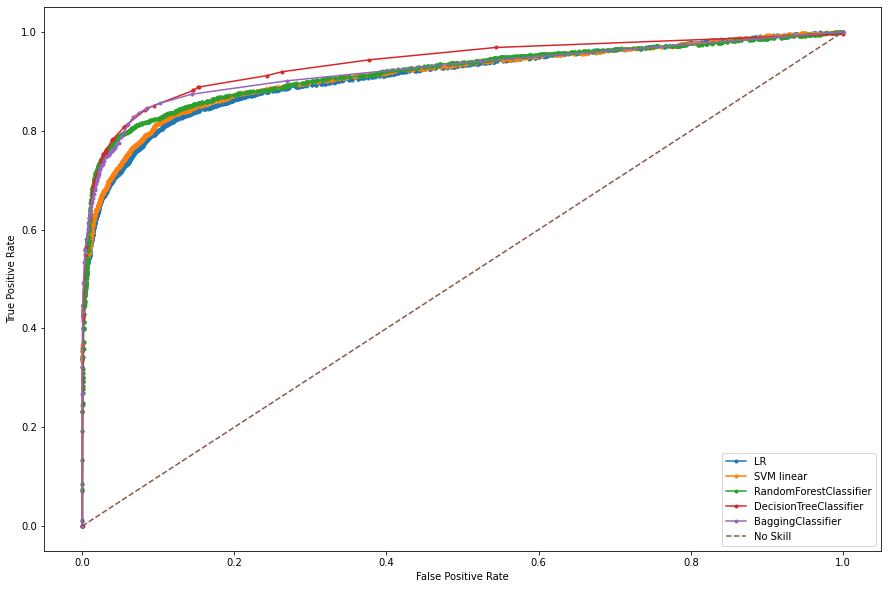

In [153]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
models = []
models.append(('LR', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('RandomForestClassifier', grid_3.best_estimator_))
models.append(('DecisionTreeClassifier', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))


model_names = [name for name, *_ in models]
parameters_names = ['precision_score', 'recall_score', 'f1_score', 'accuracy_score', 'roc_auc_score']
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
pyplot.figure(figsize=(15,10))
for name, model in models:
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))            
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test))) 
        #lr_probs = model.decision_function(X_test)
        model_probs = model.decision_function(X_test)        
        model_auc = metrics.roc_auc_score(y_test, model_probs)
        model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
        pyplot.plot(model_fpr, model_tpr, marker='.', label=name)
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
        model_probs = model.predict_proba(X_test)
        model_probs = model_probs[:, 1]
        model_auc = metrics.roc_auc_score(y_test, model_probs)
        model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
        pyplot.plot(model_fpr, model_tpr, marker='.', label=name)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
ns_probse = [0 for _ in range(len(X_test))]
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.legend()
pd.DataFrame([precision_score ,recall_score ,f1_score ,accuracy_score ,roc_auc_score], columns=model_names, index=parameters_names) 

For Model 1 Decission Tree is best ML algorithm. It has the highest ROC AUC Score.

## Model 2

This model will contain only variables that are avaiable before few hours before plane take-off.

In [ ]:
Flights_Delays_Binary_small.columns

Variables that are avaiable before start:

'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', ,'ORIGIN_AIRPORT_transformed','DESTINATION_AIRPORT_transformed', 'DEPARTURE_DELAY','TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME','DISTANCE', 'DEP_TIME', 'SCH_ARR_TIME', 'SCH_DEP_TIME', 'DATE', 'DayOfWeek', 'Holidays', 'Delayed'


In [17]:
model_2_cols = ['AIRLINE', 'FLIGHT_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT', 'TAIL_NUMBER', 'SCHEDULED_TIME','DISTANCE', 'SCH_ARR_TIME', 'SCH_DEP_TIME', 'DayOfWeek', 'Holidays', 'Delayed']
Flights_Delays_Binary_model_2 = Flights_Delays_Binary_small[model_2_cols]

In [18]:
Flights_Delays_Binary_model_2._get_numeric_data()

,FLIGHT_NUMBER,SCHEDULED_TIME,DISTANCE,DayOfWeek,Holidays,Delayed
2000009,1533,99.0,447,3,0,0
4879898,840,89.0,304,6,0,0
306622,1334,92.0,481,2,0,0
770745,3498,91.0,416,4,0,1
1997928,31,355.0,2378,3,0,0
...,...,...,...,...,...,...
2866868,1516,94.0,209,0,0,0
2679785,1218,189.0,1096,3,0,0
5521395,3562,130.0,879,5,0,0
1944079,2552,151.0,859,0,0,0


In [19]:
numeric_columns_model_2 = Flights_Delays_Binary_model_2._get_numeric_data().select_dtypes(include=np.number).columns.drop(['Delayed'])
cat_columns_model_2 = Flights_Delays_Binary_model_2.select_dtypes(exclude=np.number).columns
print(numeric_columns_model_2)
print(cat_columns_model_2)

Index(['FLIGHT_NUMBER', 'SCHEDULED_TIME', 'DISTANCE', 'DayOfWeek', 'Holidays'], dtype='object')
Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'TAIL_NUMBER',
       'SCH_ARR_TIME', 'SCH_DEP_TIME'],
      dtype='object')


In [20]:
X_train, X_test, y_train, y_test = train_test_split(Flights_Delays_Binary_model_2.drop('Delayed', axis=1),
                                                   Flights_Delays_Binary_model_2['Delayed'],
                                                   test_size=0.2,
                                                   stratify=Flights_Delays_Binary_model_2['Delayed'])

In [21]:
X_train

,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAIL_NUMBER,SCHEDULED_TIME,DISTANCE,SCH_ARR_TIME,SCH_DEP_TIME,DayOfWeek,Holidays
1672929,MQ,3060,FAR,DFW,N619MQ,165.0,968,17:46:00,15:01:00,4,0
2099207,US,2016,JAX,PHL,N700UW,126.0,742,08:36:00,06:30:00,3,0
1863270,AA,368,ORD,LGA,N3LFAA,126.0,733,16:16:00,13:10:00,2,0
5654511,EV,4188,ORD,ICT,N11551,124.0,588,11:23:00,09:19:00,0,0
2684099,WN,4207,OAK,SNA,N285WN,80.0,371,18:55:00,17:35:00,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1766310,DL,2475,MKE,ATL,N958DN,127.0,669,15:24:00,12:17:00,3,0
1705028,OO,4617,MCI,SLC,N548CA,162.0,920,19:25:00,17:43:00,6,0
396618,WN,4020,LAS,LAX,N455WN,65.0,236,08:05:00,07:00:00,1,0
696020,MQ,3372,COU,ORD,N514MQ,78.0,315,07:18:00,06:00:00,0,1


In [26]:
kfold = StratifiedKFold(n_splits=5)

NameError: name 'StratifiedKFold' is not defined

In [22]:
# numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('scale_data', MinMaxScaler())
])
# categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
# transformer = numerical + categorical
transformer = ColumnTransformer([
    ('num', numeric_transformer, numeric_columns_model_2),
    ('cat', categorical_transformer, cat_columns_model_2)
])

In [41]:
param_grid = {
            'classifier__C': [1, 10, 100,1000],
}

pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression(max_iter=10000))])

grid_1 = GridSearchCV(pipeline, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [42]:
grid_1.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   13.7s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   34.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   34.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale_data',
                                                                                          MinMaxScaler())]),
                                                                         Index(['FLIGHT_NUMBER', 'SCHEDULED_TIME', 'DISTANCE', 'DayOfWeek', 'Holidays'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['AIRLIN

In [43]:
from sklearn import  metrics
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_1.decision_function(X_test)) ))      

roc_auc_score: 0.5886328616594586


In [44]:
pipe = Pipeline([('preprocessing', transformer), ('classifier', LinearSVC(C=1, max_iter=10000))])

param_grid = {
            'classifier__C': [0.001, 0.1, 1, 10, 100,1000]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)


In [45]:
grid_2.fit(X_train, y_train)
grid_2.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.0s
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  4.8min finished


{'classifier__C': 0.001}

In [46]:
 print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_2.decision_function(X_test)) ))      

roc_auc_score: 0.617736604219045


In [47]:
from sklearn.ensemble import RandomForestClassifier 

pipe = Pipeline([('preprocessing', transformer), ('classifier', RandomForestClassifier())])

param_grid = {
            'classifier__n_estimators': [10, 20,45],
            'classifier__max_features': [30, 45,100],
            'classifier__max_depth': [40, 50,100]
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [48]:
grid_3.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    6.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   35.0s
[Parallel(n_jobs=3)]: Done 135 out of 135 | elapsed:  1.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale_data',
                                                                                          MinMaxScaler())]),
                                                                         Index(['FLIGHT_NUMBER', 'SCHEDULED_TIME', 'DISTANCE', 'DayOfWeek', 'Holidays'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(hand...nown='ignore'))]),
                                                                         Index(['AIRLINE'

In [49]:
grid_3.best_params_

{'classifier__max_depth': 40,
 'classifier__max_features': 30,
 'classifier__n_estimators': 10}

In [50]:
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_3.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.5745655340327392


In [51]:
from sklearn.tree import DecisionTreeClassifier

pipe_4 = Pipeline([('preprocessing', transformer), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_4 = {
            'classifier__max_depth': [10,20,25,30],
            'classifier__min_samples_split': [60,80,100],
            'classifier__max_leaf_nodes': [60,85,100]
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [52]:
grid_4.fit(X_train, y_train)
grid_4.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   17.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   46.5s
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:   56.5s finished


{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 60,
 'classifier__min_samples_split': 80}

In [53]:
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_4.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.5576122870647282


In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

pipe_5 = Pipeline([('preprocessing', transformer), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [50,100],
              'classifier__max_samples': [40,100]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)




In [56]:
grid_5.fit(X_train, y_train)
grid_5.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   12.0s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   24.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   24.2s finished


{'classifier__max_samples': 40, 'classifier__n_estimators': 50}

In [109]:
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_5.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.5195900631579743


## Randomized Search of hyper parameters for Random Forest Classifier

In [28]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap}


pipe = Pipeline([('preprocessing', transformer), ('classifier', RandomForestClassifier())])


rnd_clsf = RandomizedSearchCV(pipe, param_distributions=random_grid, n_iter = 100, cv = kfold, verbose=5, random_state=42, n_jobs = -1)
# Warning! It takes really long time to compute this about 2 days
rnd_clsf.fit(X_train, y_train)


#sorted(rnd_clsf.cv_results_.keys())
#classifier = rnd_clsf.best_estimator_
#params = rnd_clsf.best_params_
#scores = rnd_clsf.cv_results_['mean_test_score'].reshape(len(C_range),
#                                                     len(gamma_range))



Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 120.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 129.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scale_data',
                                                                                                MinMaxScaler())]),
                                                                               Index(['FLIGHT_NUMBER', 'SCHEDULED_TIME', 'DISTANCE', 'DayOfWeek', 'Holidays'], dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncode...
                   n_iter=100, n_jobs=-1,
                 

In [39]:
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , rnd_clsf.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.609085240209392


In [31]:
import joblib
joblib.dump(rnd_clsf.best_estimator_, 'filename.pkl')

['filename.pkl']

In [54]:


models = []
models.append(('LR', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('RandomForestClassifier', grid_3.best_estimator_))
models.append(('DecisionTreeClassifier', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))
models.append(('RandomForestClassifier_Random_Search', rnd_clsf.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))            
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

NameError: name 'grid_5' is not defined

Best algorithm for model 2 classificaiton problem is Random Forest with Random HyperParameters Search. Unfortuatly this model is having only 60% score accuracy. It turned out that best model is model 1 with 91% of accuracy of flight delay problem.